In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
# Importing the dataset
data=pd.read_csv("Ionosphere.csv")

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [6]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [ ]:
#

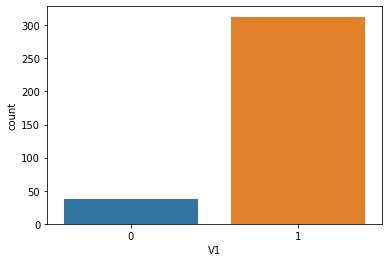

In [7]:
sns.countplot(x='V1', data=data)
plt.show()

In [8]:
import itertools

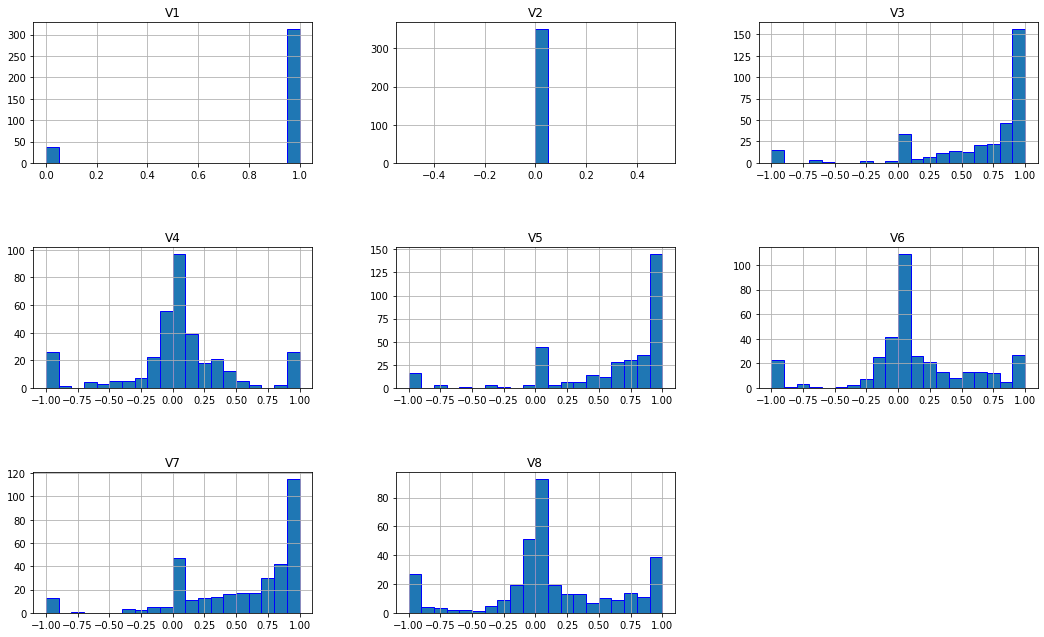

In [10]:
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.3,hspace=0.6)
    data[i].hist(bins=20,edgecolor='blue')
    plt.title(i)
plt.show()

Here, we can see that in each feature the value is lying between -1 to 1 and there number of occurences

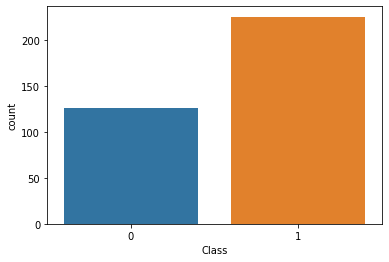

In [12]:
sns.countplot(x='Class',data=data)

##### Removing the features
The second feature, V2, has no variance and therefore isn't useful to the model

In [13]:
data.drop(columns=['V2'], inplace=True)

In [14]:
data.tail()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1
350,1,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,1


##### Preparing the Dataset for Training and validation 

In [17]:
X=data.values[:, :-1]
y=data.values[:, -1]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# The boolean feature does not need to be normalized.
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_test[:, 1:] = scaler.transform(x_test[:, 1:])

##### Visualising the dataset
Let's visualise the data and daraw interesting inference, we'll first use t-SNE to reduce the diensions of the data while keeping the relative distance of the vectors..

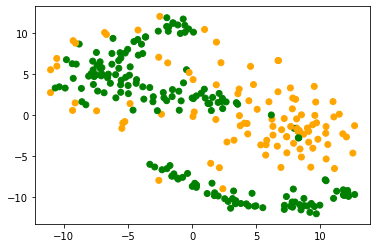

In [21]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'orange' for label in y_train])
plt.show()

###### Let's use the PCA algorithm

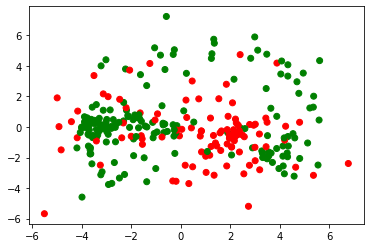

In [22]:
from sklearn.decomposition import PCA

x_embedded = PCA(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

The dataset doesn't seem to be that complicated. The data set can further be linearly seperated. We can expect a high accuracy of evan a simple model

In [54]:
X=data.iloc[:,0:32]
Y=data.iloc[:,33]

In [50]:
X.head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608


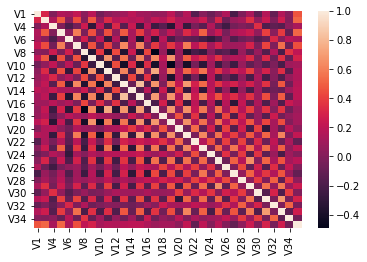

In [64]:
sns.heatmap(data.corr())

In [32]:
from sklearn.svm import LinearSVC

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

clf = LinearSVC().fit(x_train, y_train)
print('Ionosphere dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Ionosphere dataset
Accuracy of Linear SVC classifier on training set: 0.92
Accuracy of Linear SVC classifier on test set: 0.90


In [34]:
clf1 = LinearSVC(C=5, random_state = 67).fit(x_train, y_train)
print('Coefficients:\n', clf1.coef_)
print('Intercepts:\n', clf1.intercept_)

Coefficients:
 [[ 4.86101608  0.64078822 -0.34480826  0.64965089  0.45780116 -0.15239696
   0.35445617  0.14300464 -0.23624113 -0.82229148  0.01180266  0.20256487
   0.32126398  0.46968733 -0.09811358  0.10227083  0.59831652 -1.23560189
  -0.33250185  0.54314086 -0.58062888  0.07259929  0.09148708  0.95261039
  -0.06635538 -1.1720587  -0.00500494  0.52123354  1.04962838  0.64229959
   0.01254813 -0.36035118 -0.77663444]]
Intercepts:
 [-4.67389124]


C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10).fit(x_train, y_train)
svm.score(x_test, y_test)

0.9577464788732394

In [26]:
svm_poly=SVC(kernel='poly', C=100,probability=True).fit(x_train, y_train)
svm_poly.score(x_test,y_test)

0.9154929577464789

In [27]:
svm_sigmoid=SVC(kernel='sigmoid', C=100,probability=True).fit(x_train, y_train)
svm_sigmoid.score(x_test,y_test)

0.7887323943661971

In [28]:
svm_decf = SVC(kernel='rbf', C=1,decision_function_shape='ovr').fit(x_train, y_train)
svm_decf.score(x_test, y_test)

0.9577464788732394

In [29]:
x_train

array([[ 1.        ,  0.14684057, -0.15922491, ..., -0.17330023,
        -0.03251116, -0.1173425 ],
       [ 1.        ,  0.73002162,  0.03864594, ..., -0.03356963,
         1.11514219, -0.08577094],
       [ 1.        ,  0.63177019, -0.09294046, ..., -0.03252398,
         1.18221321,  0.00825146],
       ...,
       [ 1.        ,  0.73002162,  1.17667748, ..., -1.90289243,
         1.25949714, -2.10649732],
       [ 1.        ,  0.73002162, -2.42932446, ...,  1.96990694,
         1.25949714,  2.08905819],
       [ 1.        ,  0.73002162,  0.12437474, ...,  0.71694016,
         1.25949714,  0.48486656]])

In [61]:
from sklearn.linear_model import LogisticRegression

In [63]:
logR=LogisticRegression(random_state=0)
logR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred=logR.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [75]:
# Calculating the Residuals
from sklearn import metrics
print ('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:', metrics.mean_squared_error(y_test,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 0.10227272727272728
MSE: 0.10227272727272728
RMSE: 0.31980107453341566


Inference 1:- By MAE: The distance between the real data and predictd data is less
    
Inference 2:- By MSE: The squared averge distance between the real and predicted data which is less

Inference 3:- By RMSE: We take square root of MSE, so that there is no negative value cancellation

##### As we can see the output has less value so our model is good